# **USED CARS SELLING PRICE PREDICTION**

### **IMPORT REQUIRED LIBRARIES**

In [1]:
# DATA MANAGEMENT
import pandas as pd
import numpy as np

# VISUALIZATIONS
import matplotlib.pyplot as plt
import seaborn as sns

# FEATURE ENCODING

# MACHINE LEARNING
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

### **LOADING THE DATA**

In [2]:
file = pd.read_csv('/content/Car.csv')
df = pd.DataFrame(file)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


### **UNDERSTANDING THE DATA**

In [3]:
df.shape

(4340, 8)

In [4]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
df['name'].value_counts()

,count
name,
Maruti Swift Dzire VDI,69
Maruti Alto 800 LXI,59
Maruti Alto LXi,47
Hyundai EON Era Plus,35
Maruti Alto LX,35
...,...
Honda Brio 1.2 S Option MT,1
Mahindra Bolero Power Plus Plus Non AC BSIV PS,1
Tata Indigo LS BSII,1


In [8]:
df.dtypes.value_counts()

,count
object,5
int64,3


In [9]:
df['transmission'].value_counts()

,count
transmission,
Manual,3892
Automatic,448


In [10]:
df['owner'].value_counts()

,count
owner,
First Owner,2832
Second Owner,1106
Third Owner,304
Fourth & Above Owner,81
Test Drive Car,17


In [11]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,3244
Dealer,994
Trustmark Dealer,102


In [12]:
df['fuel'].value_counts()

,count
fuel,
Diesel,2153
Petrol,2123
CNG,40
LPG,23
Electric,1


In [13]:
df['year'].value_counts()

,count
year,
2017,466
2015,421
2012,415
2013,386
2014,367
2018,366
2016,357
2011,271
2010,234


In [14]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object


In [15]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [16]:
print("Total Null values :", df.isnull().sum().sum())

Total Null values : 0


In [17]:
print("Total Duplicate rows :" ,df.duplicated().sum())

Total Duplicate rows : 763


### **CLEANING THE DATA**

In [18]:
# Our data has no null values , but over 750 duplicate ones , so we drop those duplicates to avoid bias in the model
df.drop_duplicates(inplace=True)
print("Total Duplicates after dropping :", df.duplicated().sum())

Total Duplicates after dropping : 0


In [19]:
# As we saw while understanding our data , there is only 1 electric car , lets delete that to avoid learning noise
df = df[df['fuel'] != 'Electric']


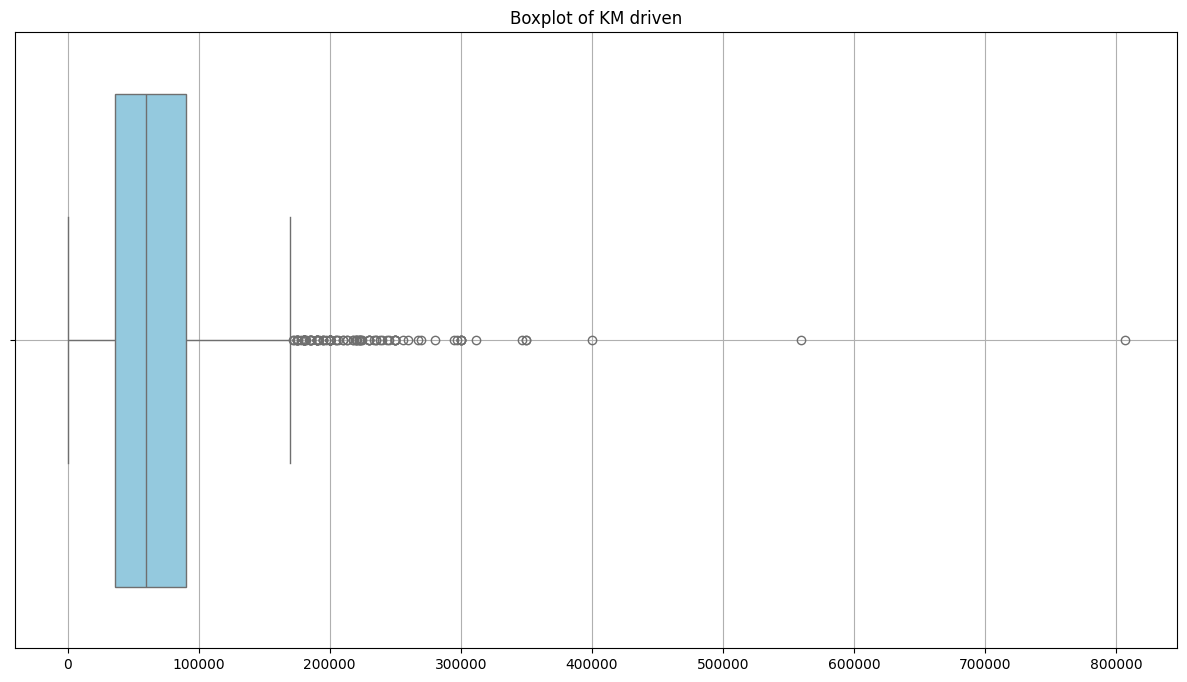

In [20]:
# Checking for outliers

plt.figure(figsize=(15, 8))
sns.boxplot(x=df['km_driven'],color='skyblue')
plt.title('Boxplot of KM driven')
plt.xlabel("")
plt.grid(True)
plt.show()


/tmp/ipython-input-2248369801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selling_price_lakhs'] = df['selling_price'] / 100000


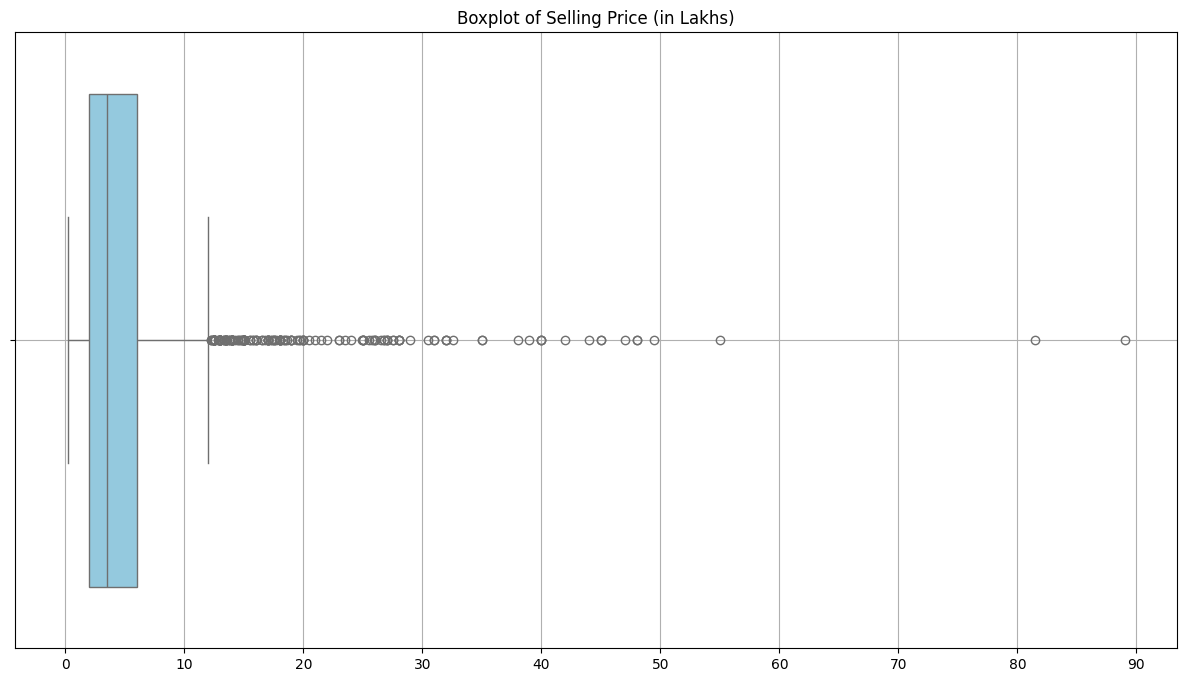

In [21]:
df['selling_price_lakhs'] = df['selling_price'] / 100000

plt.figure(figsize=(15, 8))
sns.boxplot(x=df['selling_price_lakhs'],color='skyblue')
tick_marks = np.arange(0,100,10)
plt.xticks(tick_marks)
plt.title('Boxplot of Selling Price (in Lakhs)')
plt.xlabel("")
plt.grid(True)
plt.show()

In [22]:
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['selling_price'] < lower_bound) | (df['selling_price'] > upper_bound)]

outliers_display = outliers[['name', 'year', 'selling_price', 'km_driven']]
outliers_display


,name,year,selling_price,km_driven
12,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000
35,Audi A6 2.0 TDI Design Edition,2013,1735000,50000
36,Mercedes-Benz New C-Class C 220 CDI Avantgarde,2012,1375000,33800
...,...,...,...,...
4200,Ford Ecosport 1.5 Diesel Titanium Plus,2019,1250000,6590
4204,Ford Endeavour 3.2 Titanium AT 4X4,2016,1800000,126000
4224,Toyota Fortuner 2.7 2WD AT,2016,2500000,70000
4228,Mahindra XUV500 W10 AWD,2015,1225000,70000


In [23]:
# Most of these rows give value to the dataset , but are treated as outliers due to Majority of the 4k values belonging to small and cheap cars

In [24]:
# Lets keep 99.9 percentile of the data

q_high = df['selling_price'].quantile(0.93)
df = df[df['selling_price'] <= q_high]

q1_high = df['km_driven'].quantile(0.93)
df = df[df['km_driven'] <= q1_high]

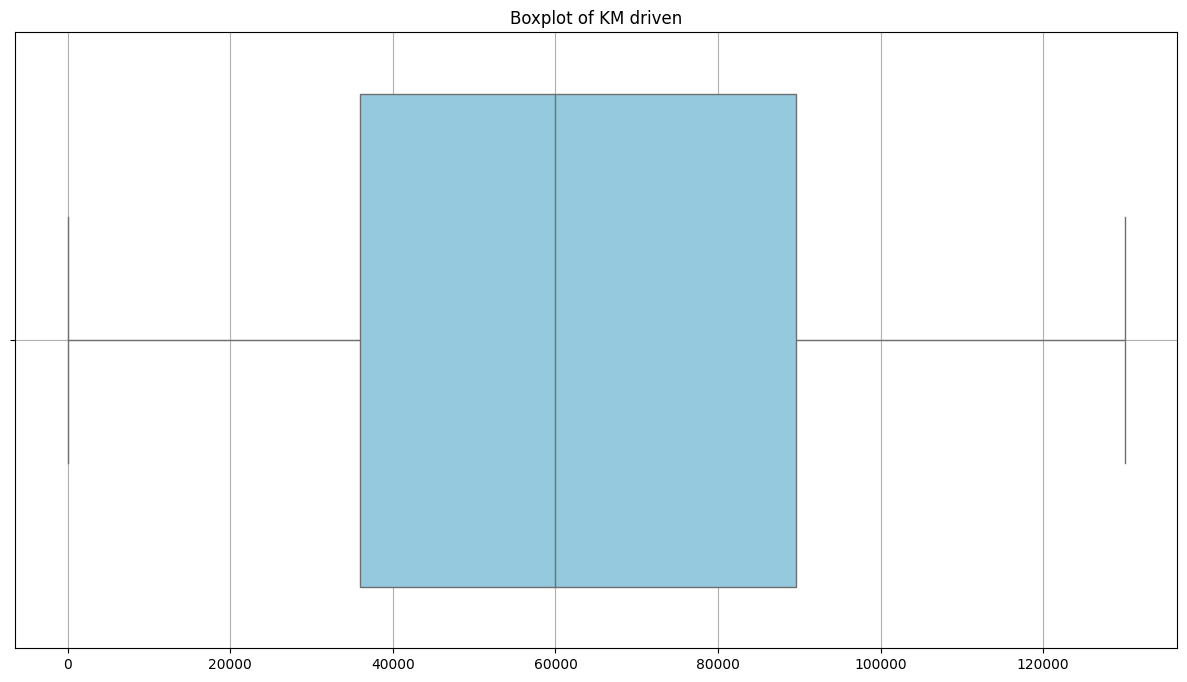

In [25]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df['km_driven'], color='skyblue')
plt.title('Boxplot of KM driven')
plt.xlabel("")
plt.grid(True)
plt.show()

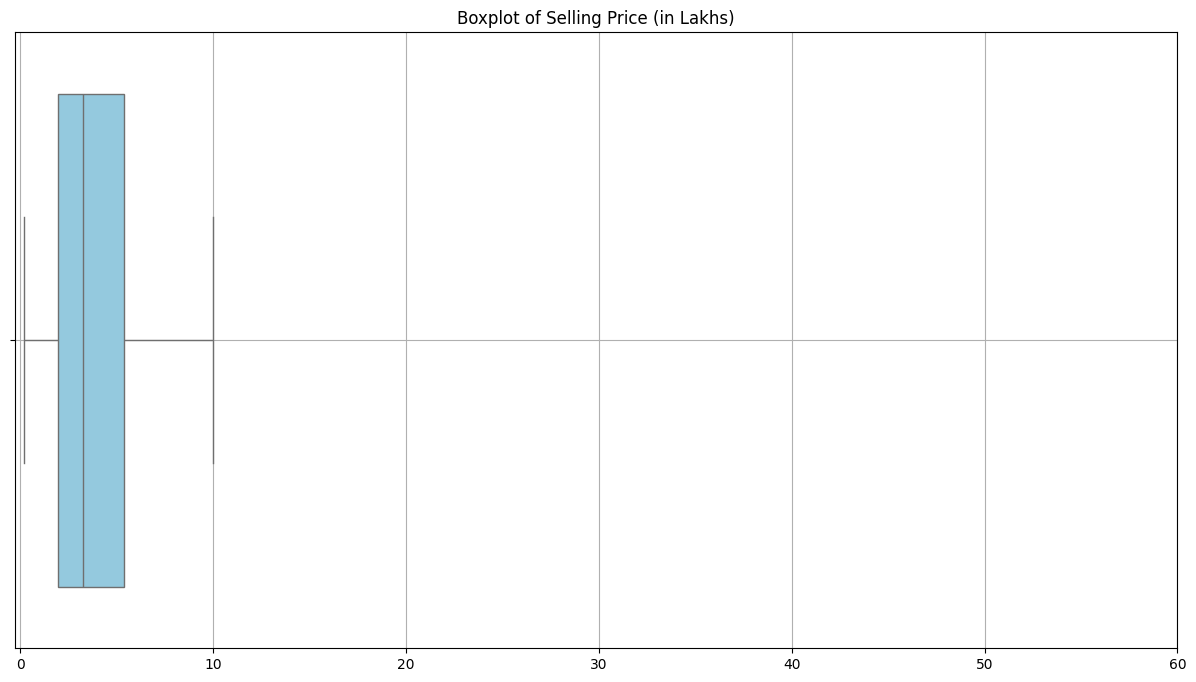

In [26]:
df.loc[:, 'selling_price_lakhs'] = df['selling_price'] / 100000

plt.figure(figsize=(15, 8))
sns.boxplot(x=df['selling_price_lakhs'], color='skyblue')
tick_marks = np.arange(0,70,10)
plt.xticks(tick_marks)
plt.title('Boxplot of Selling Price (in Lakhs)')
plt.xlabel("")
plt.grid(True)
plt.show()

In [27]:
print("Total Number of rows after removing duplicates and outliers :", df.shape[0])

Total Number of rows after removing duplicates and outliers : 3097


### **EXPLORATORY DATA ANALYSIS**

**UNIVARIATE ANALYSIS**

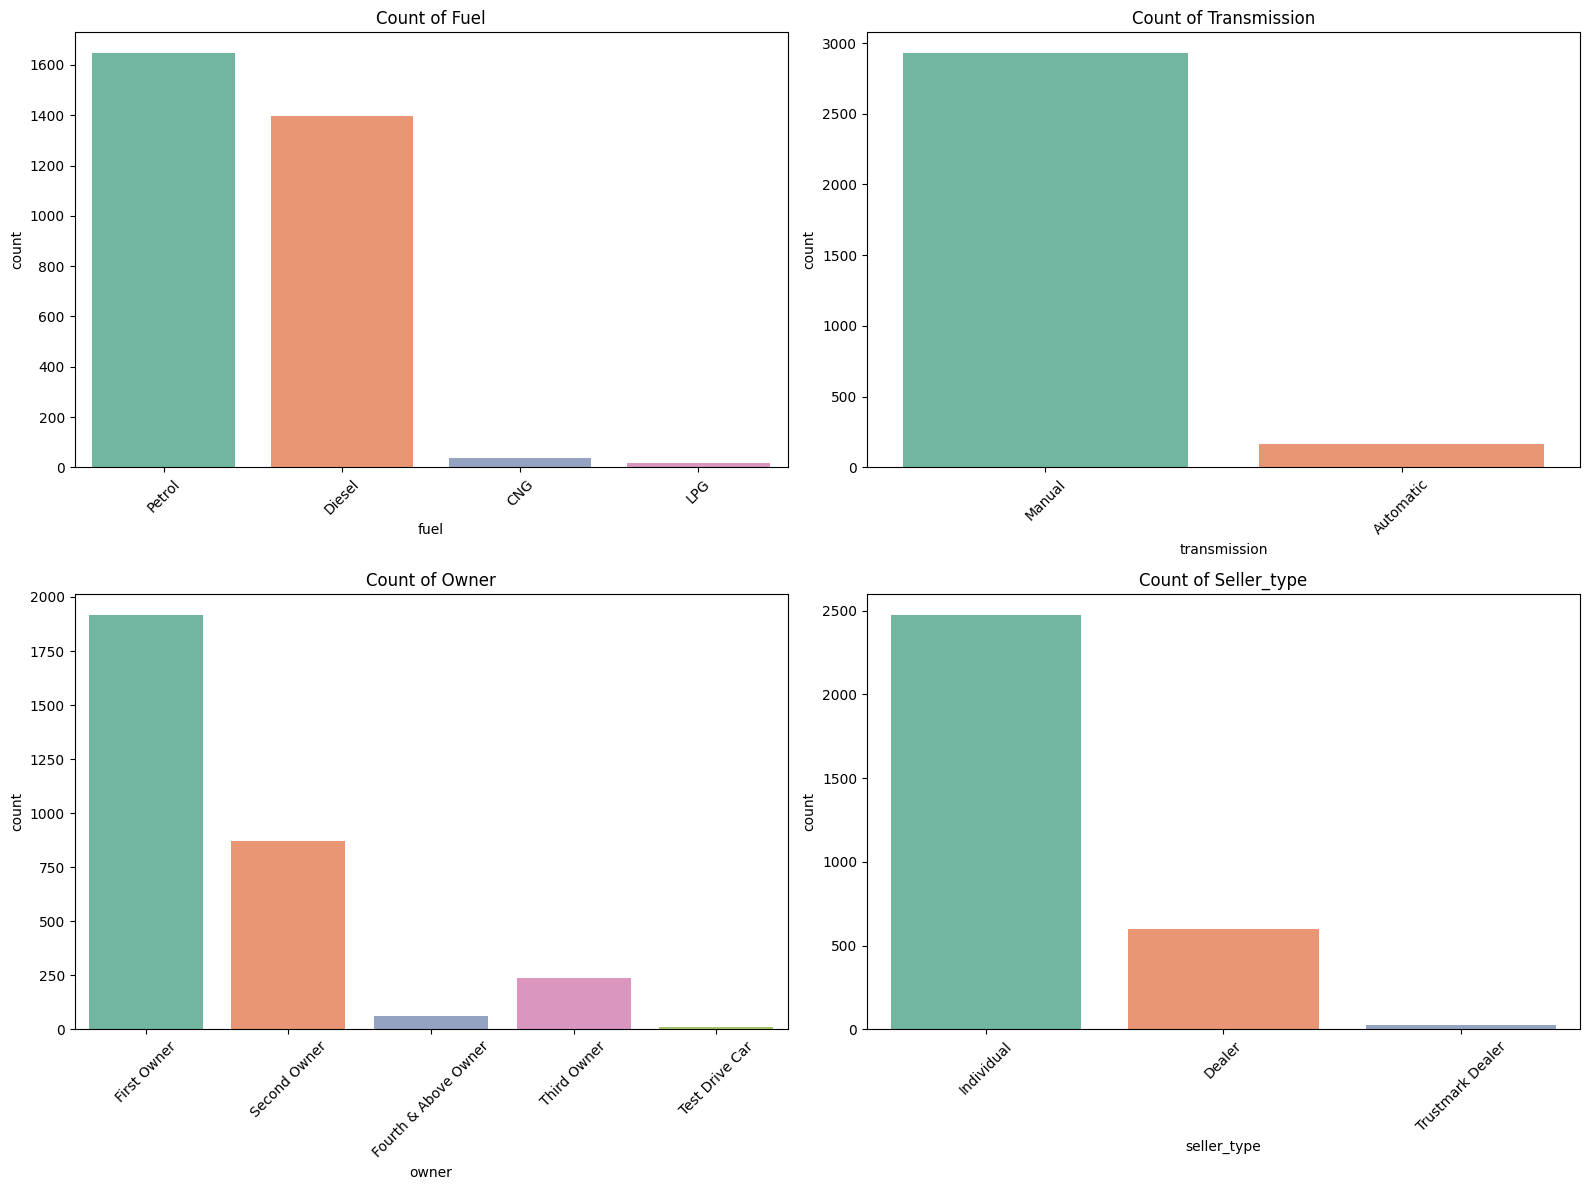

In [28]:
categorical_cols = ['fuel', 'transmission', 'owner', 'seller_type']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette='Set2', legend=False)
    axes[i].set_title(f'Count of {col.capitalize()}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


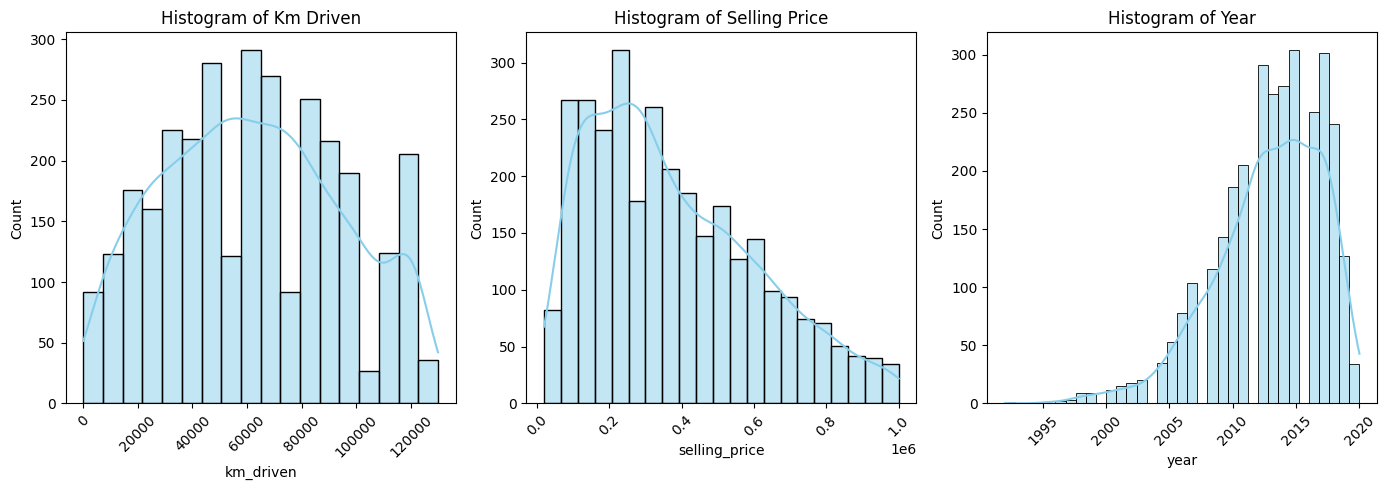

In [29]:
cols = ['km_driven', 'selling_price','year']
fig, axes = plt.subplots(1, 3, figsize=(14, 5))  # 1 row, 2 columns
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Histogram of {col.replace("_", " ").title()}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**BITIVARIATE ANALYSIS**

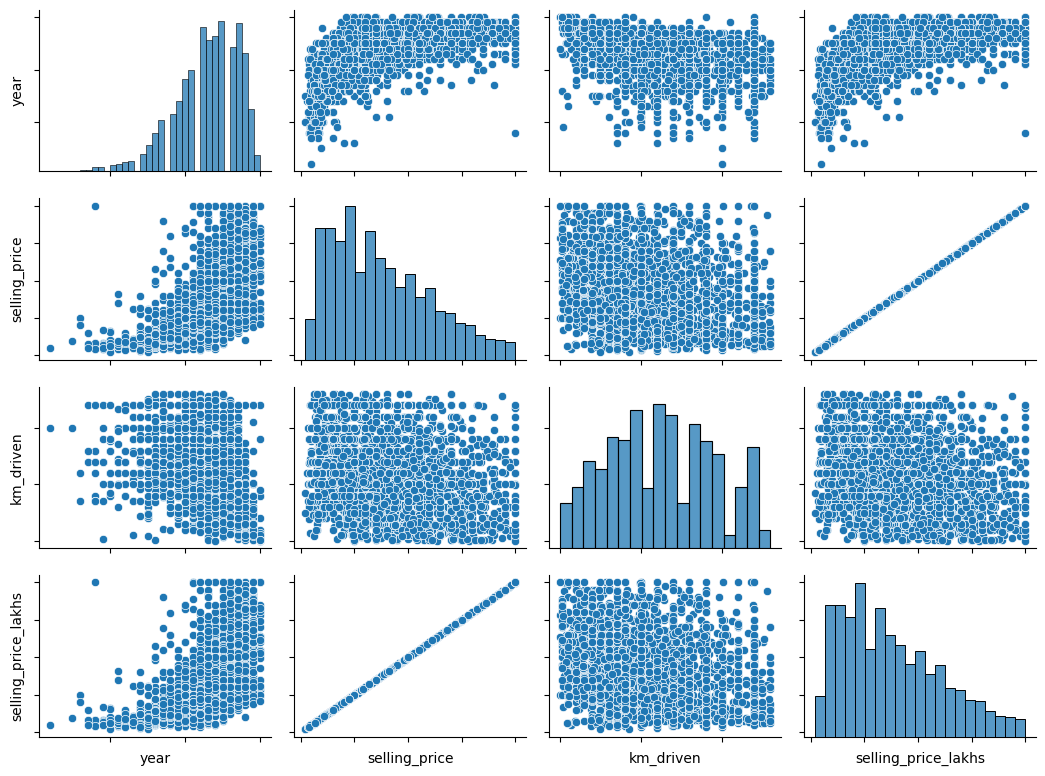

In [30]:
g = sns.pairplot(df, height=2, aspect=1.4)

for ax in g.axes.flatten():
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.show()

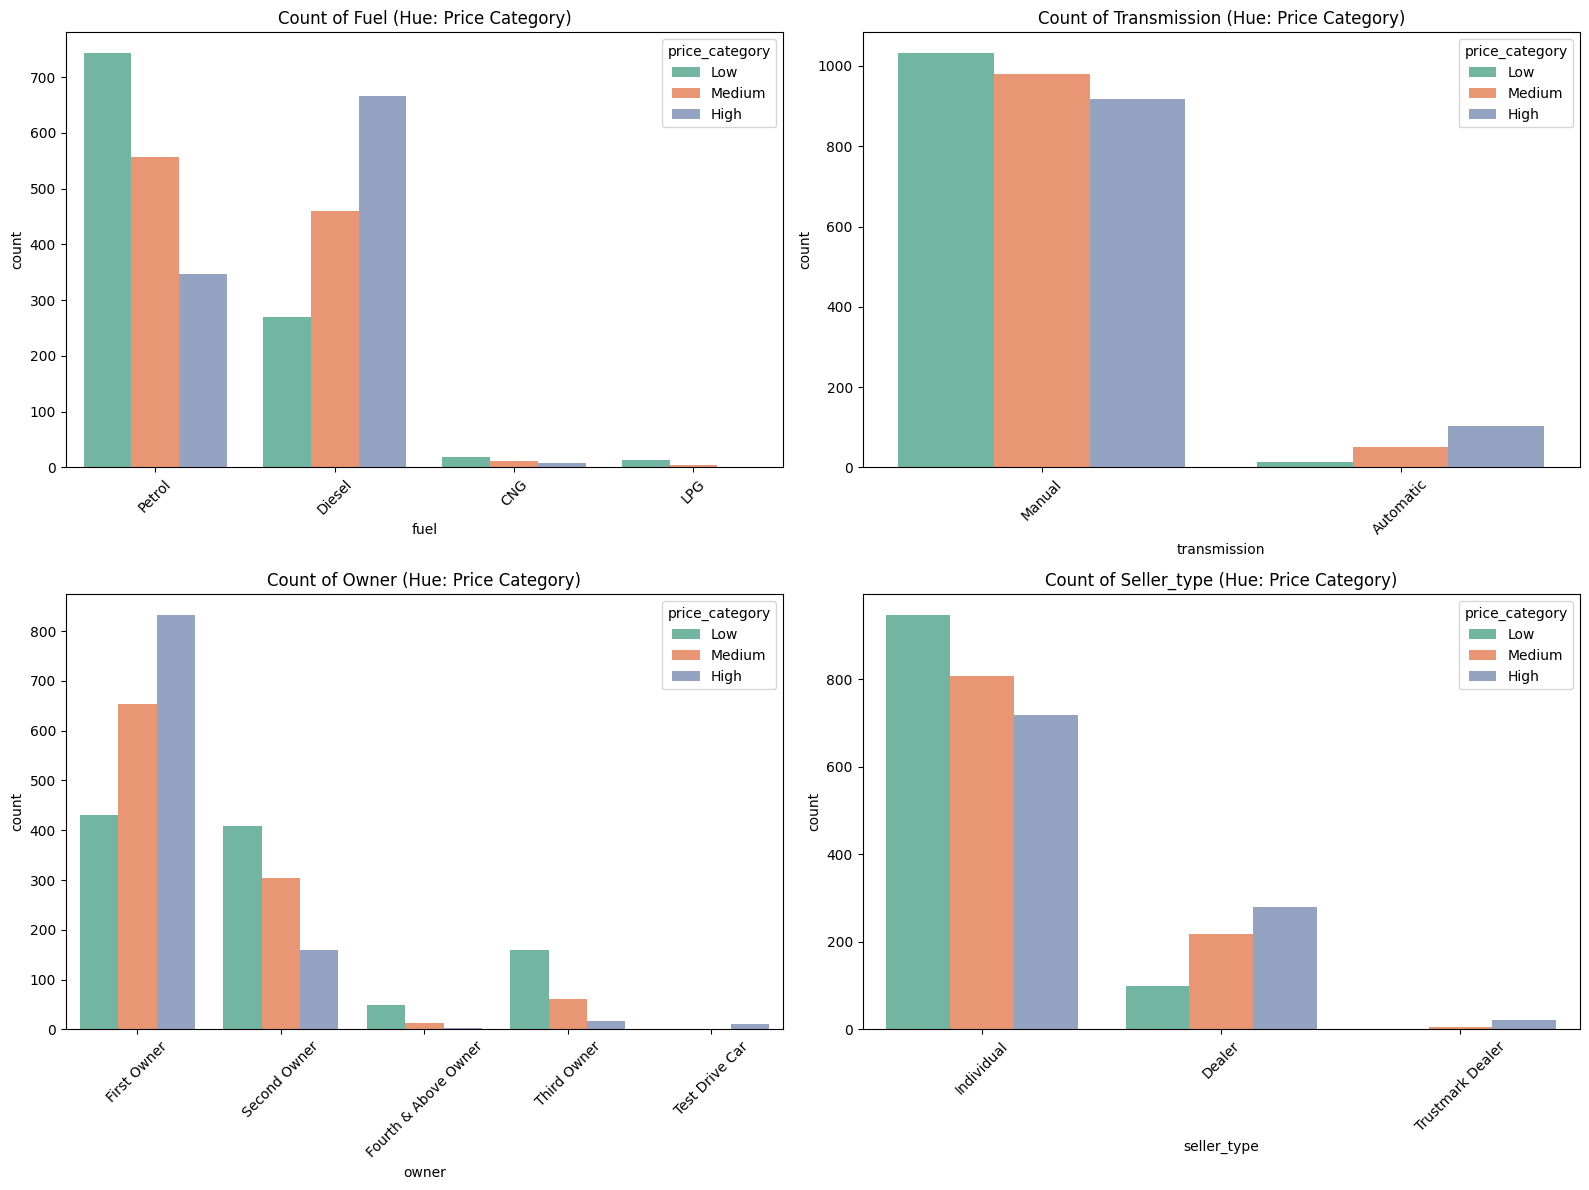

In [31]:

df['price_category'] = pd.qcut(df['selling_price_lakhs'], q=3, labels=['Low', 'Medium', 'High'])

categorical_cols = ['fuel', 'transmission', 'owner', 'seller_type']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='price_category', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Count of {col.capitalize()} (Hue: Price Category)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

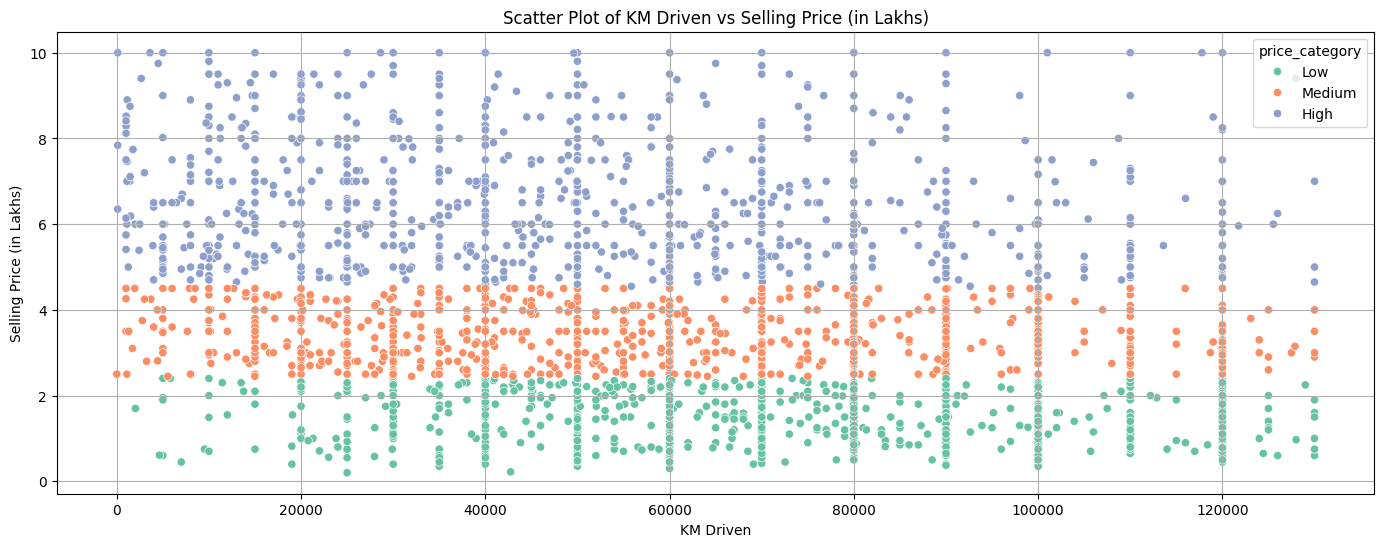

In [32]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=df, x='km_driven', y='selling_price_lakhs', hue='price_category', palette='Set2')
plt.title('Scatter Plot of KM Driven vs Selling Price (in Lakhs)')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price (in Lakhs)')
plt.grid()
plt.show()

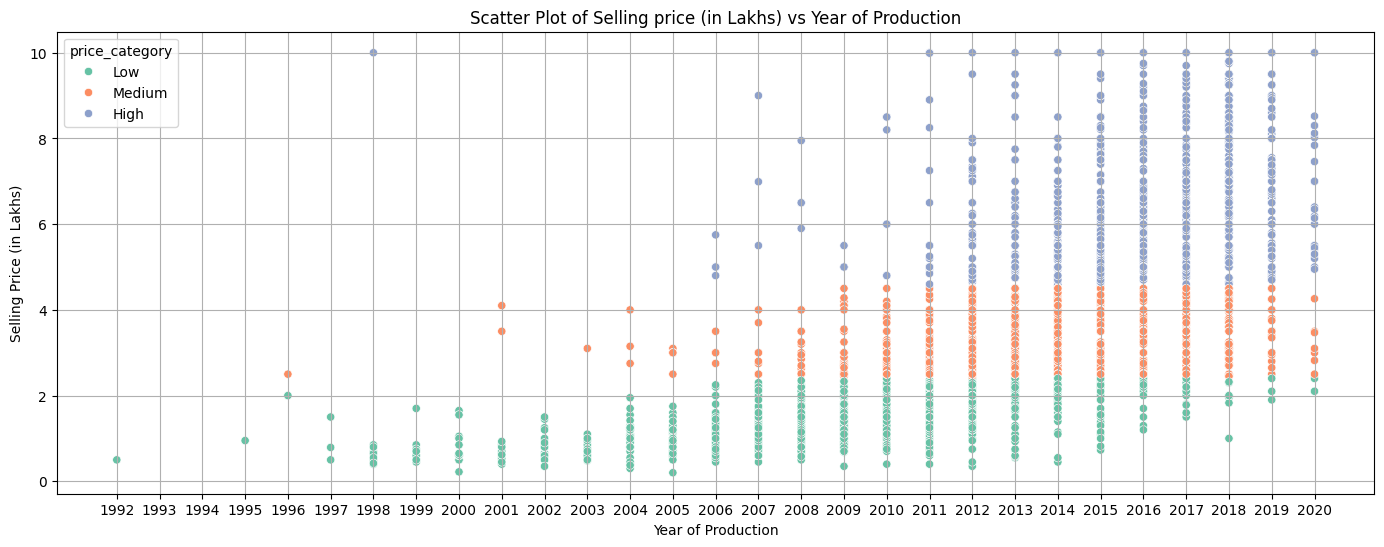

In [33]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=df, x='year', y='selling_price_lakhs', hue='price_category', palette='Set2')
plt.title('Scatter Plot of Selling price (in Lakhs) vs Year of Production')
year_ticks = np.arange(1992,2021,1)
plt.xticks(year_ticks)
plt.grid(True)
plt.xlabel('Year of Production')
plt.ylabel('Selling Price (in Lakhs)')
plt.show()

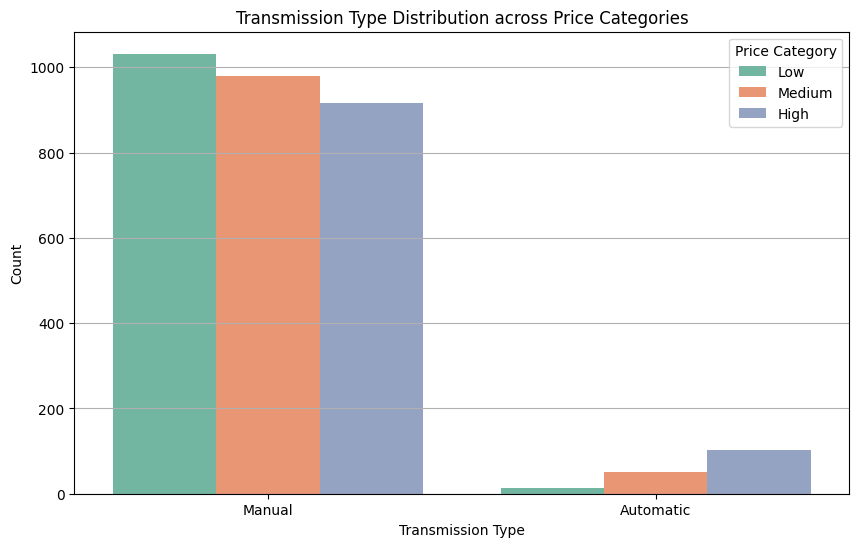

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transmission', hue='price_category', palette='Set2')

plt.title('Transmission Type Distribution across Price Categories')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Price Category')
plt.show()


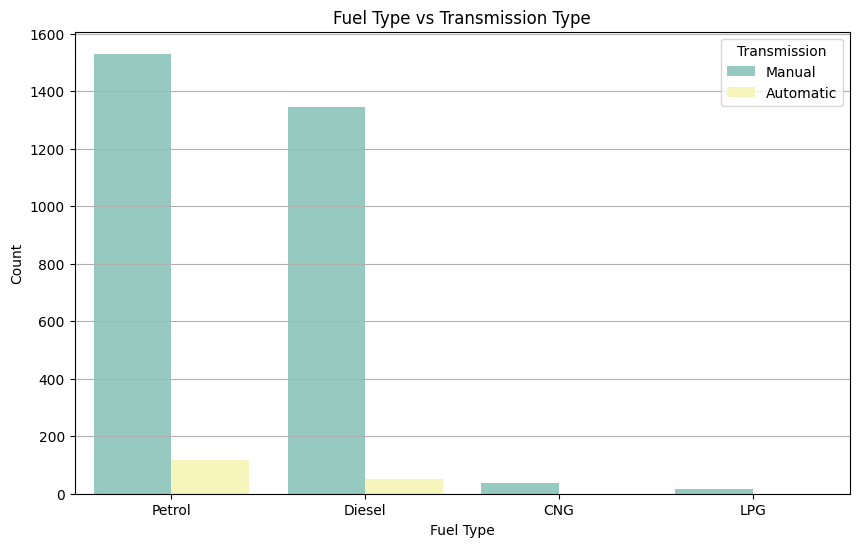

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fuel', hue='transmission', palette='Set3')

plt.title('Fuel Type vs Transmission Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Transmission')
plt.show()


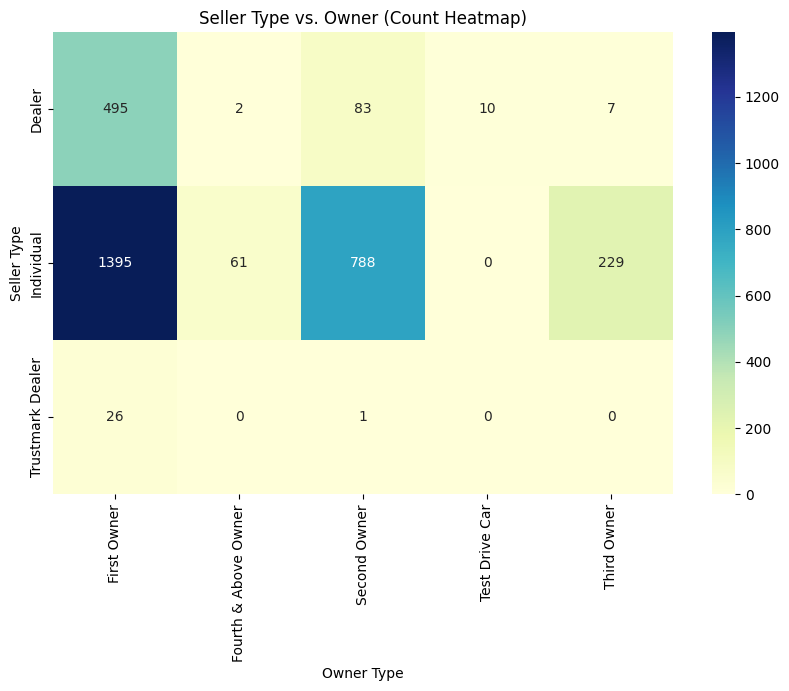

In [36]:

heatmap_data = pd.crosstab(df['seller_type'], df['owner'])

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Seller Type vs. Owner (Count Heatmap)')
plt.xlabel('Owner Type')
plt.ylabel('Seller Type')
plt.show()


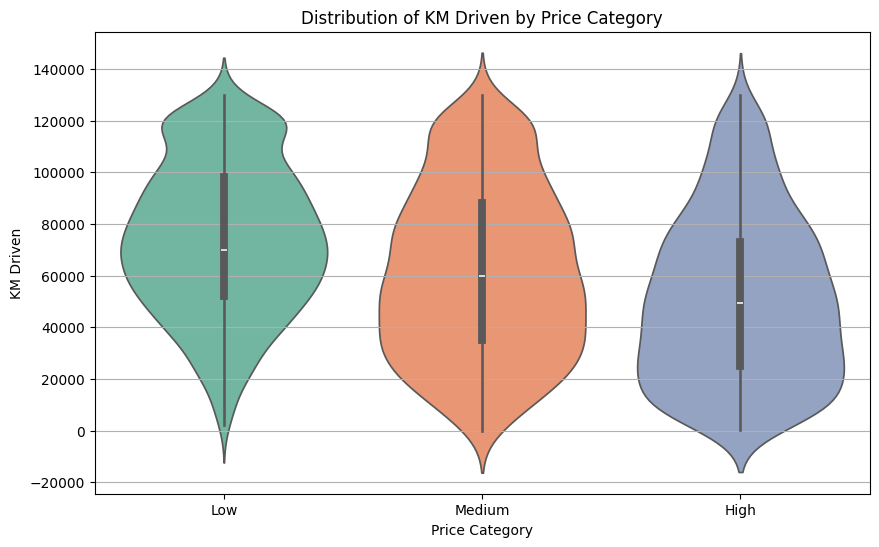

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='price_category', y='km_driven', hue = 'price_category', palette='Set2')

plt.title('Distribution of KM Driven by Price Category')
plt.xlabel('Price Category')
plt.ylabel('KM Driven')
plt.grid(axis='y')
plt.show()


### **FEATURE ENGINEERING**

### **ADDING REQUIRED COLUMNS**

In [38]:
df['brand'] = (df['name'].str.split(n=1,expand=True).loc[:,0])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,selling_price_lakhs,price_category,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0.60000,Low,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,1.35000,Low,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,6.00000,High,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2.50000,Medium,Datsun
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner,1.40000,Low,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,4.09999,Medium,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,4.09999,Medium,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,1.10000,Low,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,8.65000,High,Hyundai


In [39]:
df.drop(columns=['price_category','selling_price_lakhs'],inplace=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner,Maruti
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


**FEATURE ENCODING**

In [40]:
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 0
}
df['owner_encoded'] = df['owner'].map(owner_mapping)
df.drop(columns=['owner'],inplace=True)

In [41]:
df['brand'].value_counts()

,count
brand,
Maruti,1030
Hyundai,590
Tata,270
Mahindra,242
Honda,193
Ford,187
Chevrolet,144
Renault,105
Volkswagen,85


In [42]:
df = pd.get_dummies(df, columns=['fuel', 'transmission', 'seller_type','brand'], drop_first=True)
df.head()

,name,year,selling_price,km_driven,owner_encoded,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,...,brand_Maruti,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen
0,Maruti 800 AC,2007,60000,70000,1,False,False,True,True,True,...,True,False,False,False,False,False,False,False,False,False
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,False,False,True,True,True,...,True,False,False,False,False,False,False,False,False,False
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Datsun RediGO T Option,2017,250000,46000,1,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
5,Maruti Alto LX BSIII,2007,140000,125000,1,False,False,True,True,True,...,True,False,False,False,False,False,False,False,False,False


**FEATURE SCALING**

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['year', 'km_driven_scaled', 'selling_price_scaled']] = scaler.fit_transform(df[['year','km_driven', 'selling_price']])


In [44]:
df

,name,year,selling_price,km_driven,owner_encoded,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,...,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,km_driven_scaled,selling_price_scaled
0,Maruti 800 AC,0.535714,60000,70000,1,False,False,True,True,True,...,False,False,False,False,False,False,False,False,0.538458,0.040816
1,Maruti Wagon R LXI Minor,0.535714,135000,50000,1,False,False,True,True,True,...,False,False,False,False,False,False,False,False,0.384611,0.117347
2,Hyundai Verna 1.6 SX,0.714286,600000,100000,1,True,False,False,True,True,...,False,False,False,False,False,False,False,False,0.769229,0.591837
3,Datsun RediGO T Option,0.892857,250000,46000,1,False,False,True,True,True,...,False,False,False,False,False,False,False,False,0.353841,0.234694
5,Maruti Alto LX BSIII,0.535714,140000,125000,1,False,False,True,True,True,...,False,False,False,False,False,False,False,False,0.961538,0.122449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),0.785714,409999,80000,2,True,False,False,True,True,...,False,False,False,False,False,False,False,False,0.615382,0.397958
4336,Hyundai i20 Magna 1.4 CRDi,0.785714,409999,80000,2,True,False,False,True,True,...,False,False,False,False,False,False,False,False,0.615382,0.397958
4337,Maruti 800 AC BSIII,0.607143,110000,83000,2,False,False,True,True,True,...,False,False,False,False,False,False,False,False,0.638459,0.091837
4338,Hyundai Creta 1.6 CRDi SX Option,0.857143,865000,90000,1,True,False,False,True,True,...,False,False,False,False,False,False,False,False,0.692305,0.862245


# **MACHINE LEARNING MODELS**

In [45]:
df.drop(columns=['selling_price','km_driven'],inplace = True)

In [46]:
X = df.drop(['selling_price_scaled','name'], axis=1)  # drop target
y = df['selling_price_scaled']

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
models = {
    "LinearRegression": LinearRegression(),

    "Ridge": Ridge(alpha=10, random_state=42),

    "Lasso": Lasso(alpha=0.001, max_iter=10000, random_state=42),

    "DecisionTree": DecisionTreeRegressor(
        max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42
    ),

    "RandomForest": RandomForestRegressor(
        n_estimators=300, max_depth=20, min_samples_split=5,
        min_samples_leaf=2, random_state=42, n_jobs=-1
    ),

    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=5,
        subsample=0.8, random_state=42
    ),

    "AdaBoost": AdaBoostRegressor(
        n_estimators=300, learning_rate=0.05, random_state=42
    ),

    "SVR": SVR(
        kernel="rbf", C=100, gamma=0.1, epsilon=0.1
    ),

    "XGB": XGBRegressor(
        n_estimators=600, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42, n_jobs=-1, verbosity=0
    )
}

In [59]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    print(f"\n Model: {name}")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    mean_cv_r2 = cv_scores.mean()
    std_cv_r2 = cv_scores.std()
    print(f"Cross-Validation R²: {mean_cv_r2:.3f} ± {std_cv_r2:.3f}")

    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Test metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"Test RMSE: {rmse:.3f}")
    print(f"Test R² Score: {r2:.3f}")

    # Save results
    results.append({
        'Model': name,
        'CV R² Mean': round(mean_cv_r2, 3),
        'CV R² Std': round(std_cv_r2, 3),
        'Test RMSE': round(rmse, 3),
        'Test R²': round(r2, 3)
    })

results_df = pd.DataFrame(results)
print("\nFinal Model Comparison:\n")
print(results_df.sort_values(by="Test R²", ascending=False).reset_index(drop=True))


 Model: LinearRegression
Cross-Validation R²: 0.630 ± 0.037
Test RMSE: 0.145
Test R² Score: 0.629

 Model: Ridge
Cross-Validation R²: 0.617 ± 0.033
Test RMSE: 0.150
Test R² Score: 0.606

 Model: Lasso
Cross-Validation R²: 0.613 ± 0.030
Test RMSE: 0.152
Test R² Score: 0.591

 Model: DecisionTree
Cross-Validation R²: 0.545 ± 0.051
Test RMSE: 0.160
Test R² Score: 0.547

 Model: RandomForest
Cross-Validation R²: 0.662 ± 0.034
Test RMSE: 0.137
Test R² Score: 0.668

 Model: GradientBoosting
Cross-Validation R²: 0.660 ± 0.038
Test RMSE: 0.139
Test R² Score: 0.661

 Model: AdaBoost
Cross-Validation R²: 0.558 ± 0.038
Test RMSE: 0.160
Test R² Score: 0.548

 Model: SVR
Cross-Validation R²: 0.649 ± 0.042
Test RMSE: 0.137
Test R² Score: 0.670

 Model: XGB
Cross-Validation R²: 0.654 ± 0.037
Test RMSE: 0.140
Test R² Score: 0.655

Final Model Comparison:

              Model  CV R² Mean  CV R² Std  Test RMSE  Test R²
0               SVR       0.649      0.042      0.137    0.670
1      RandomForest  

In [60]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Base models
estimators = [
    ('svr', SVR(
        kernel="rbf", C=100, gamma=0.1, epsilon=0.1
    )),

    ('rf', RandomForestRegressor(
        n_estimators=300, max_depth=20, min_samples_split=5,
        min_samples_leaf=2, random_state=42, n_jobs=-1
    )),

    ('gbr', GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=5,
        subsample=0.8, random_state=42
    )),

    ('xgb', XGBRegressor(
        n_estimators=600, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42, n_jobs=-1, verbosity=0
    ))
]

# Meta-model
final_estimator = LinearRegression()

# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    passthrough=True,
    cv=5,
    n_jobs=-1
)

# Fit model
stacking_model.fit(X_train, y_train)

# Predict
y_pred = stacking_model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"Stacking Regressor Test RMSE: {rmse:.3f}")
print(f"Stacking Regressor Adjusted R^2: {adj_r2:.3f}")
print(f"Stacking Regressor Test R^2: {r2:.3f}")

Stacking Regressor Test RMSE: 0.017
Stacking Regressor Adjusted R^2: 0.682
Stacking Regressor Test R^2: 0.698
